In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
competitor_df = pd.read_csv("../../data/raw/competitivelandscape.csv")

In [3]:
competitor_df.head()

,Date,Channel,Brand,Mentions_Count,Sentiment_Score,Share_of_Voice
0,2023-01-02,E Commerce,Amazon Solimo,156,61.3,15.0
1,2023-01-02,E Commerce,Minute Maid,346,70.0,33.2
2,2023-01-02,E Commerce,Real Fruit Juice,542,70.9,51.9
3,2023-01-02,General Trade,Minute Maid,551,72.4,53.8
4,2023-01-02,General Trade,Paper Boat,474,67.0,46.2


In [4]:
competitor_df.describe()

,Mentions_Count,Sentiment_Score,Share_of_Voice
count,1260.000000,1260.000000,1260.000000
mean,409.838889,70.063571,41.667302
std,207.061264,5.547975,12.816972
min,101.000000,50.100000,13.400000
25%,255.000000,66.600000,31.100000
50%,367.000000,70.100000,40.100000
75%,521.250000,73.800000,51.700000
max,1575.000000,86.100000,67.600000


In [5]:
len(competitor_df)

1260

In [6]:
competitor_df.nunique()

Date               105
Channel              5
Brand                6
Mentions_Count     579
Sentiment_Score    260
Share_of_Voice     390
dtype: int64

In [7]:
competitor_df.Brand.unique()

array(['Amazon Solimo', 'Minute Maid', 'Real Fruit Juice', 'Paper Boat',
       'B Natural', 'Tropicana'], dtype=object)

In [8]:
competitor_df.Channel.unique()

array(['E Commerce', 'General Trade', 'HoReCa', 'Modern Trade',
       'Q Commerce'], dtype=object)

### Mentions_Count by Brand
1. Our brand, Minute Maid is leading in the Mentions_Count, showcasing a high marketing influence of the brand in the market.
2. Paper Boat and B Natural have approximate same Mentions_Count
3. Amazon Solimo, Real Fruit Juice and Tropicana are having approximate same Mentions_count
The marketing influence reduces in the same chronological order

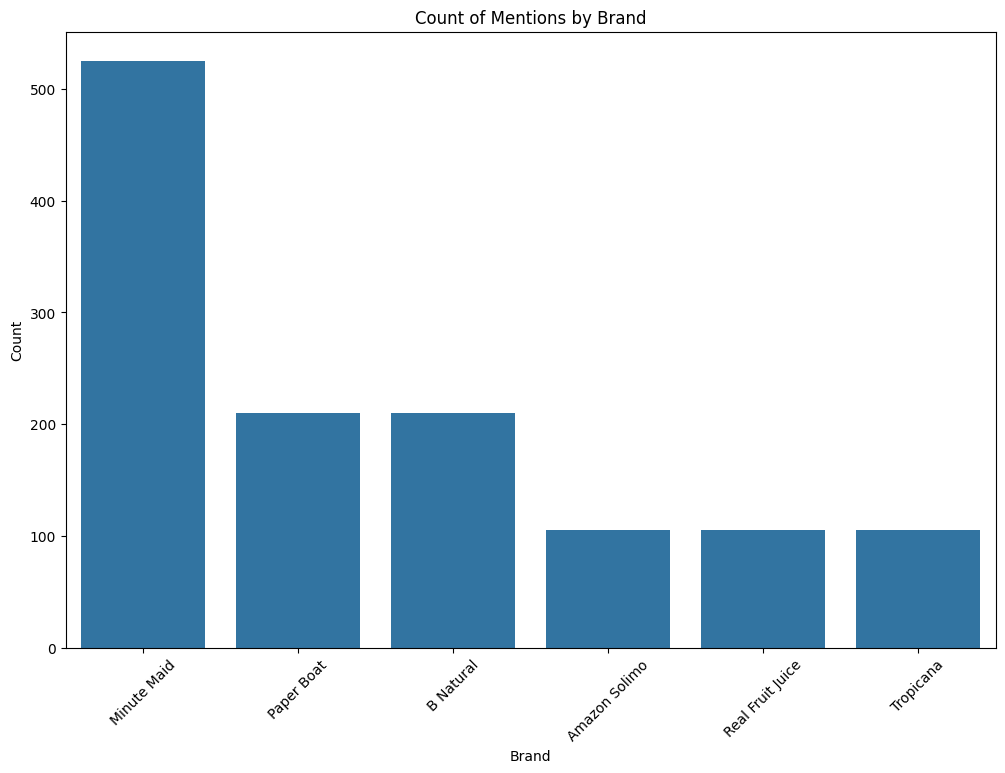

In [9]:
# Plot the count of mentions by Brand
plt.figure(figsize=(12, 8))
sns.countplot(data=competitor_df, x='Brand', order=competitor_df['Brand'].value_counts().index)
plt.title('Count of Mentions by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Year-wise segregation of Brands vs Mentions_Count  on monthly basis
1. The mentions fluctuate significantly, suggesting periodic spikes, likely due to marketing campaigns, product launches, or events -- SEASONAL CAMPAIGNS
2. Many brands, such as Minute Maid, Real Fruit Juice, and Paper Boat, see spikes in mentions during summer months (June–July), which aligns with the seasonal demand for juices and beverages -- MARKETING BEHAVIOR & SEASONAL CONSUMER BEHAVIOR

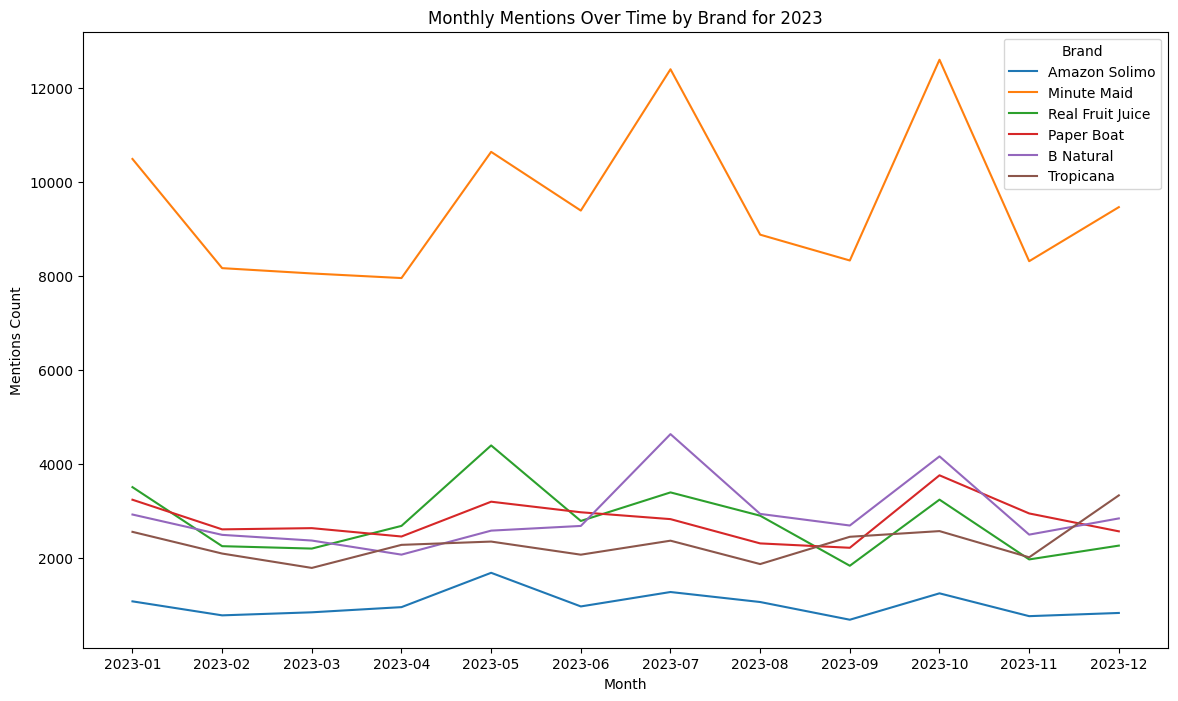

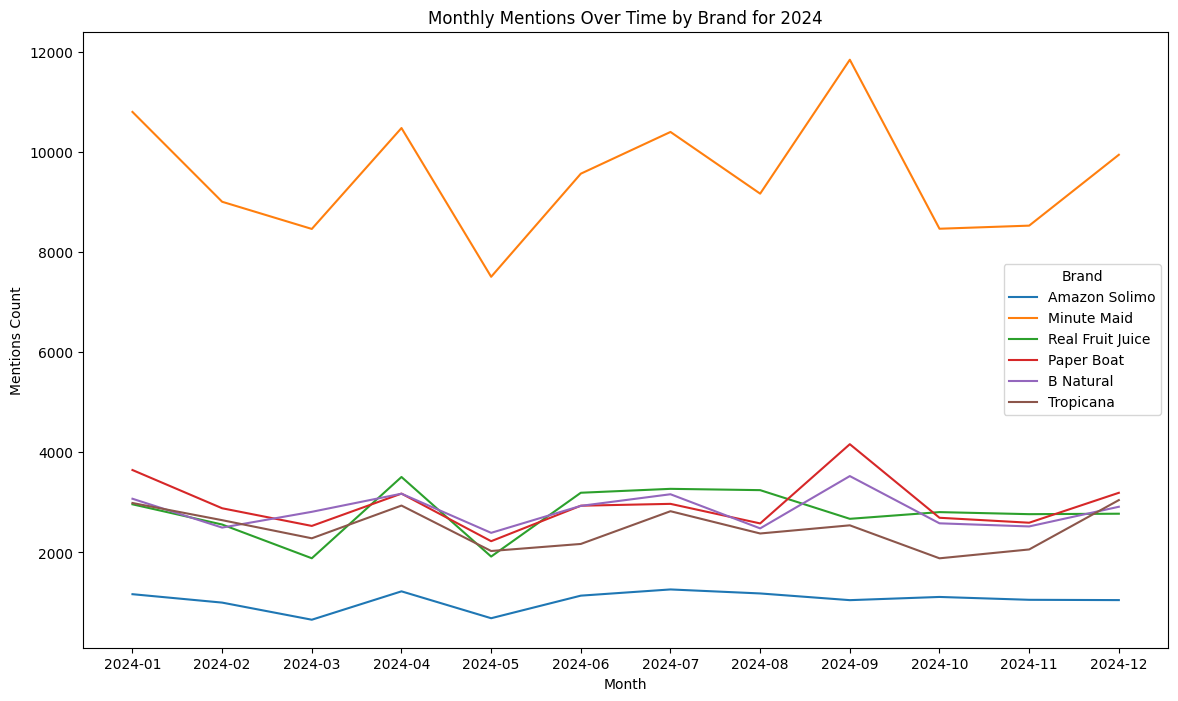

In [10]:
# Aggregate data on a monthly basis
competitor_df['Date'] = pd.to_datetime(competitor_df['Date'])
competitor_df['Month'] = competitor_df['Date'].dt.to_period('M')
monthly_mentions = competitor_df.groupby(['Brand', 'Month'])['Mentions_Count'].sum().reset_index()

# Plot line chart for each brand based on the monthly mentions for the year 2023
plt.figure(figsize=(14, 8))
for brand in competitor_df['Brand'].unique():
    brand_data = monthly_mentions[(monthly_mentions['Brand'] == brand) & (monthly_mentions['Month'].dt.year == 2023)]
    plt.plot(brand_data['Month'].astype(str), brand_data['Mentions_Count'], label=brand)

plt.title('Monthly Mentions Over Time by Brand for 2023')
plt.xlabel('Month')
plt.ylabel('Mentions Count')
plt.legend(title='Brand')
plt.show()

# Plot line chart for each brand based on the monthly mentions for the year 2024
plt.figure(figsize=(14, 8))
for brand in competitor_df['Brand'].unique():
    brand_data = monthly_mentions[(monthly_mentions['Brand'] == brand) & (monthly_mentions['Month'].dt.year == 2024)]
    plt.plot(brand_data['Month'].astype(str), brand_data['Mentions_Count'], label=brand)

plt.title('Monthly Mentions Over Time by Brand for 2024')
plt.xlabel('Month')
plt.ylabel('Mentions Count')
plt.legend(title='Brand')
plt.show()

### Avg. Sentiment_Score by Channel/Brands
We can scale sentiments from -1 to 1. <br>
Most of the Channels/Brands have an overall positive sentiment

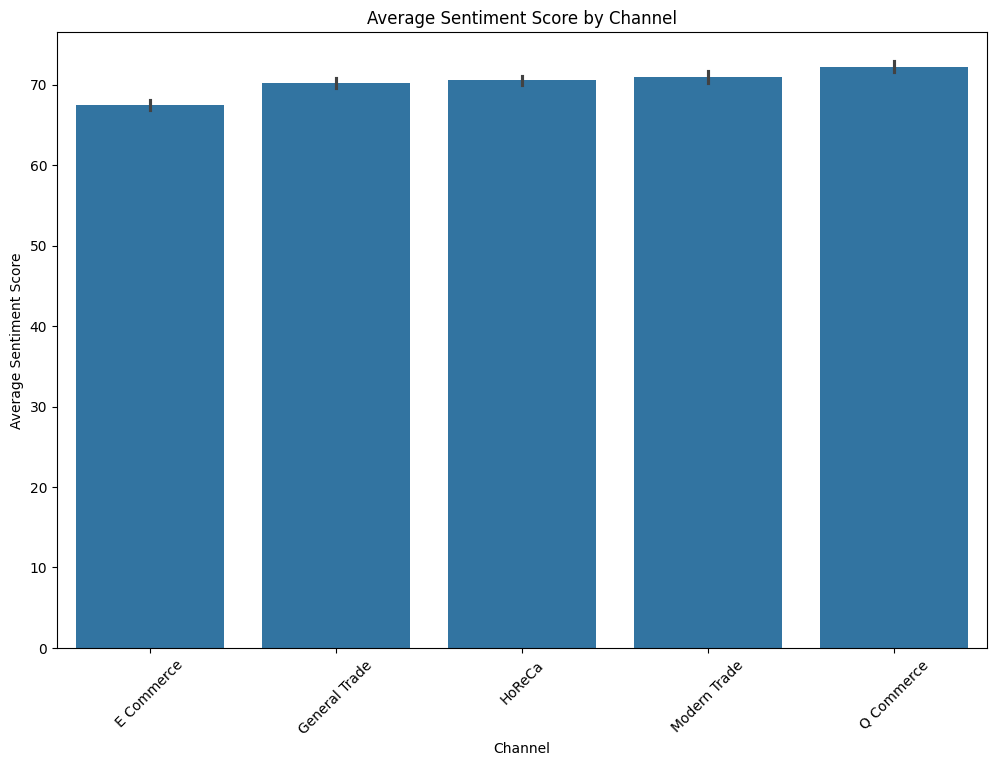

In [11]:
# Plot the average Sentiment Score by Channel
plt.figure(figsize=(12, 8))
sns.barplot(data=competitor_df, x='Channel', y='Sentiment_Score', estimator=np.mean)
plt.title('Average Sentiment Score by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

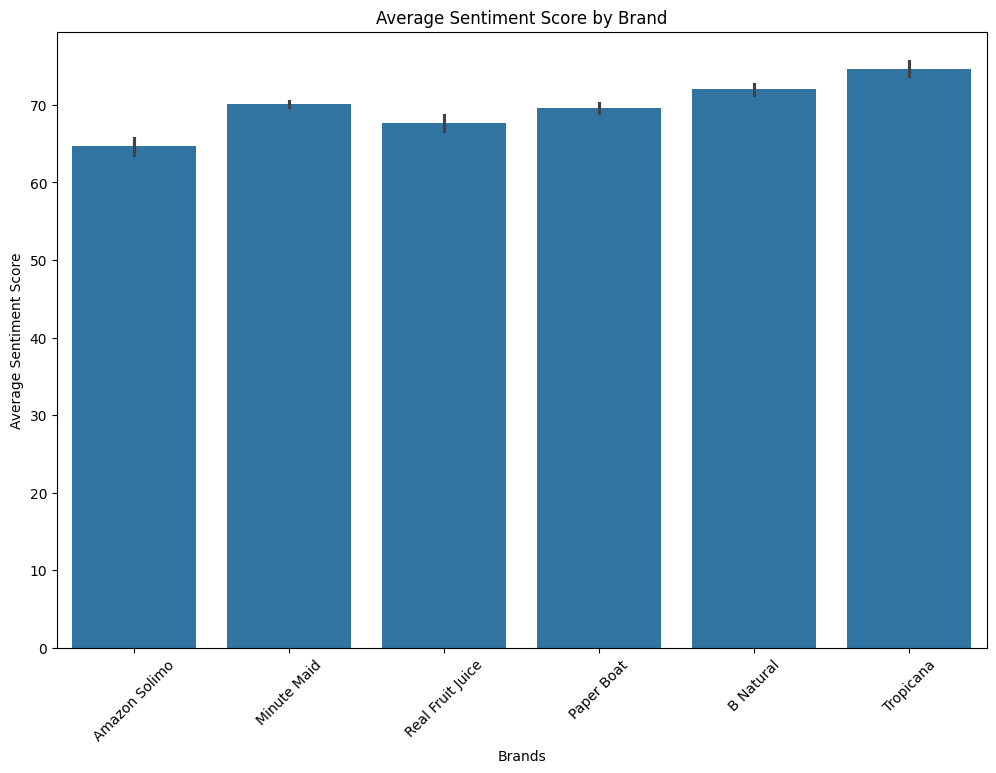

In [12]:
# Plot the average Sentiment Score by Brand
plt.figure(figsize=(12, 8))
sns.barplot(data=competitor_df, x='Brand', y='Sentiment_Score', estimator=np.mean)
plt.title('Average Sentiment Score by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

### Brand-wise sentiment score distribution
1. Even though, leading in Mentions_Count, Minute Maid lies in the mid-range of sentiments.
2. While Tropicana is in mid-range of Mentions_Count, it is having an overall highest Sentiment value, leading in customers.

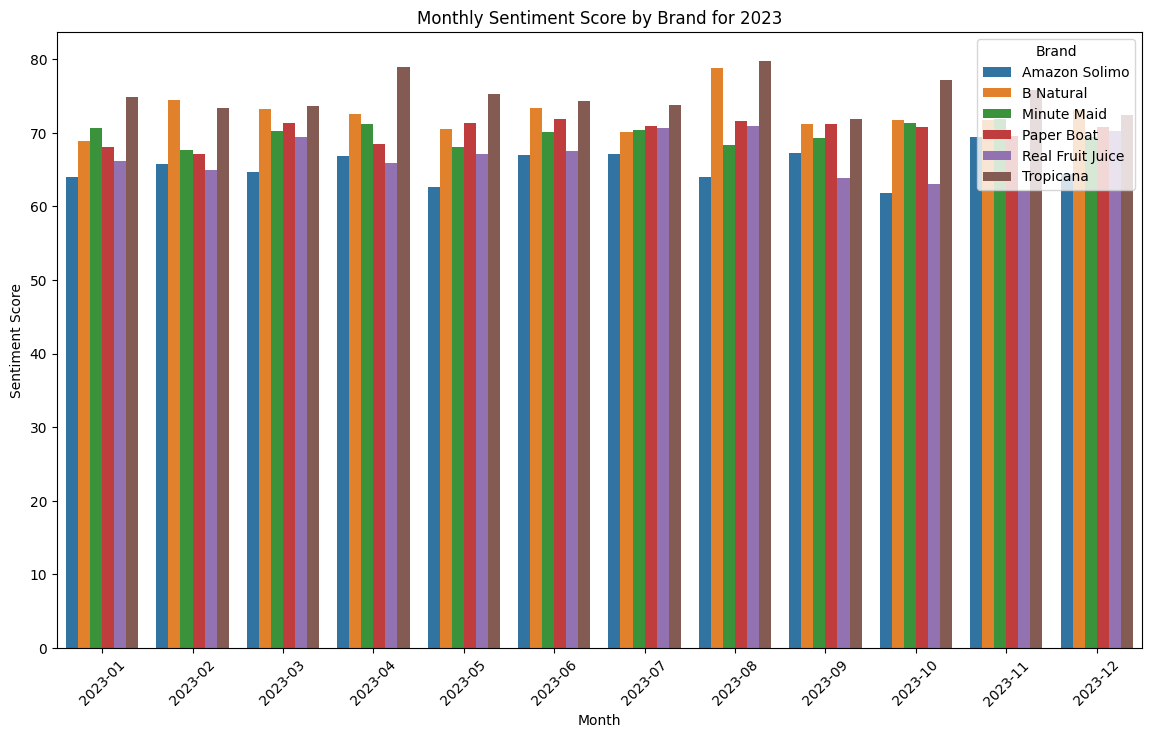

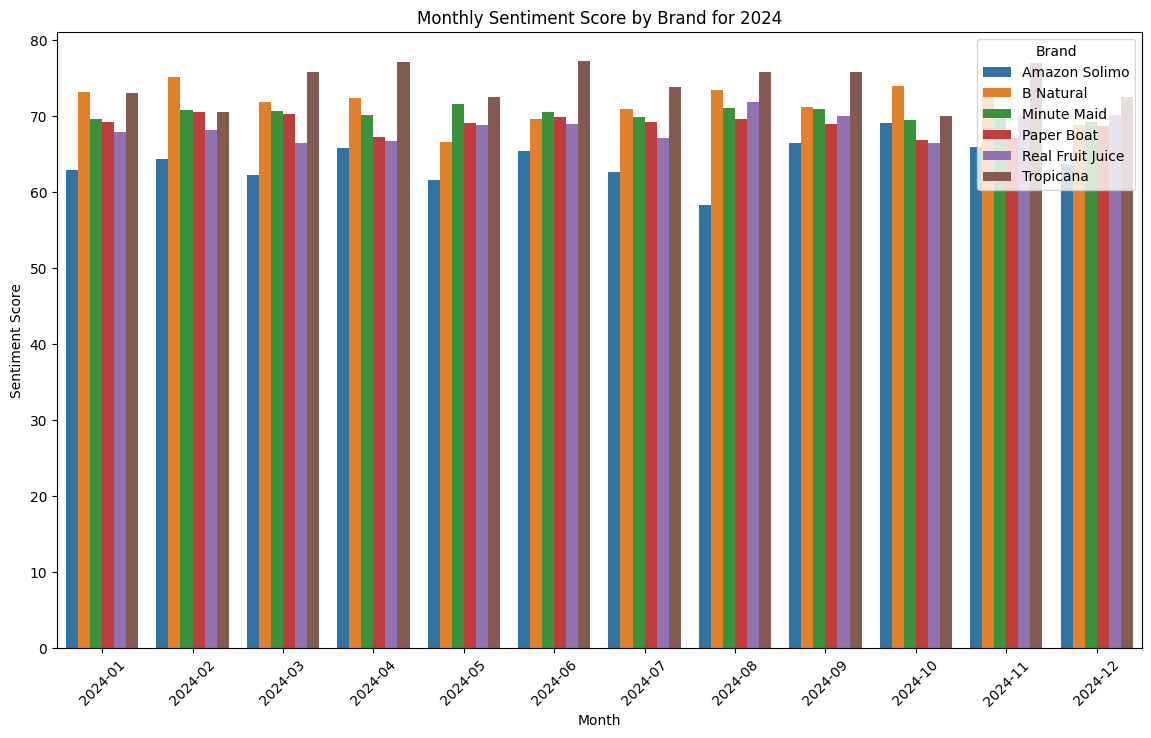

In [13]:
# Filter data for the year 2023
monthly_sentiment_2023 = competitor_df[competitor_df['Date'].dt.year == 2023].groupby(['Brand', 'Month'])['Sentiment_Score'].mean().reset_index()

# Plot bar chart for each brand based on the monthly sentiment score for the year 2023
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_sentiment_2023, x='Month', y='Sentiment_Score', hue='Brand')
plt.title('Monthly Sentiment Score by Brand for 2023')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()

# Filter data for the year 2024
monthly_sentiment_2024 = competitor_df[competitor_df['Date'].dt.year == 2024].groupby(['Brand', 'Month'])['Sentiment_Score'].mean().reset_index()

# Plot bar chart for each brand based on the monthly sentiment score for the year 2024
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_sentiment_2024, x='Month', y='Sentiment_Score', hue='Brand')
plt.title('Monthly Sentiment Score by Brand for 2024')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()

### Market Analysis of Minute Maid and other brands based on sentiment score
Our brand is doing good compared to all other brands, sentiment-wise, making an overall positive impact on customers

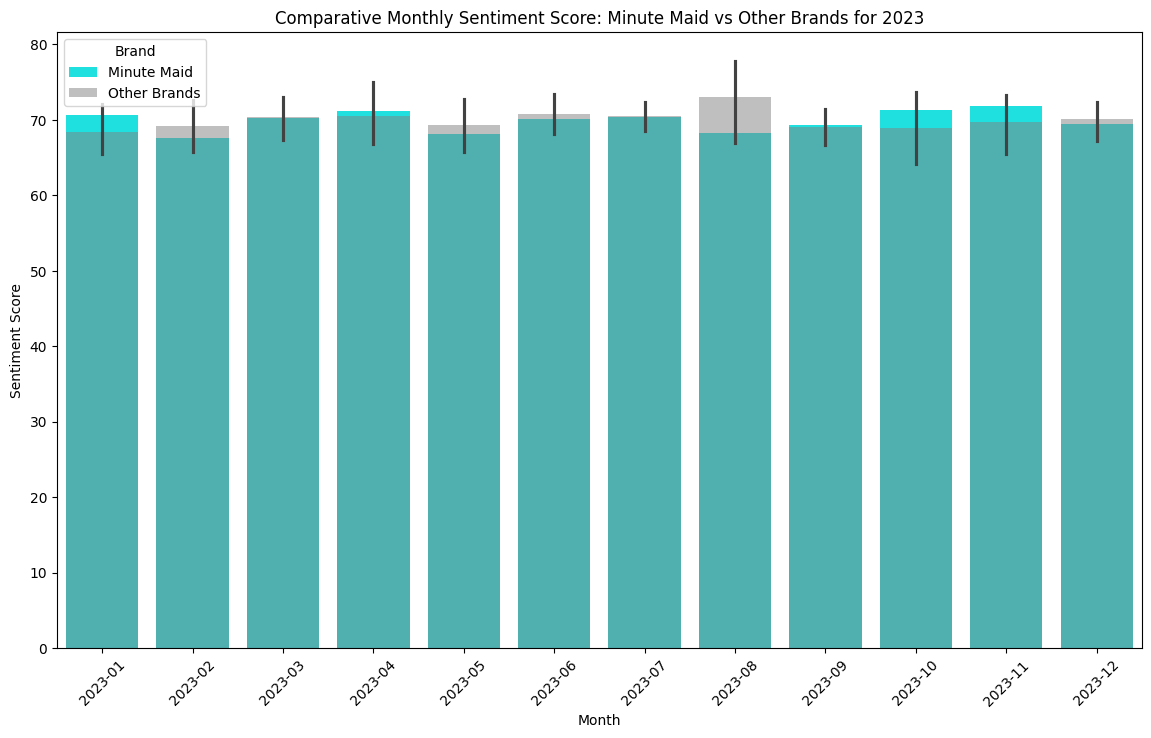

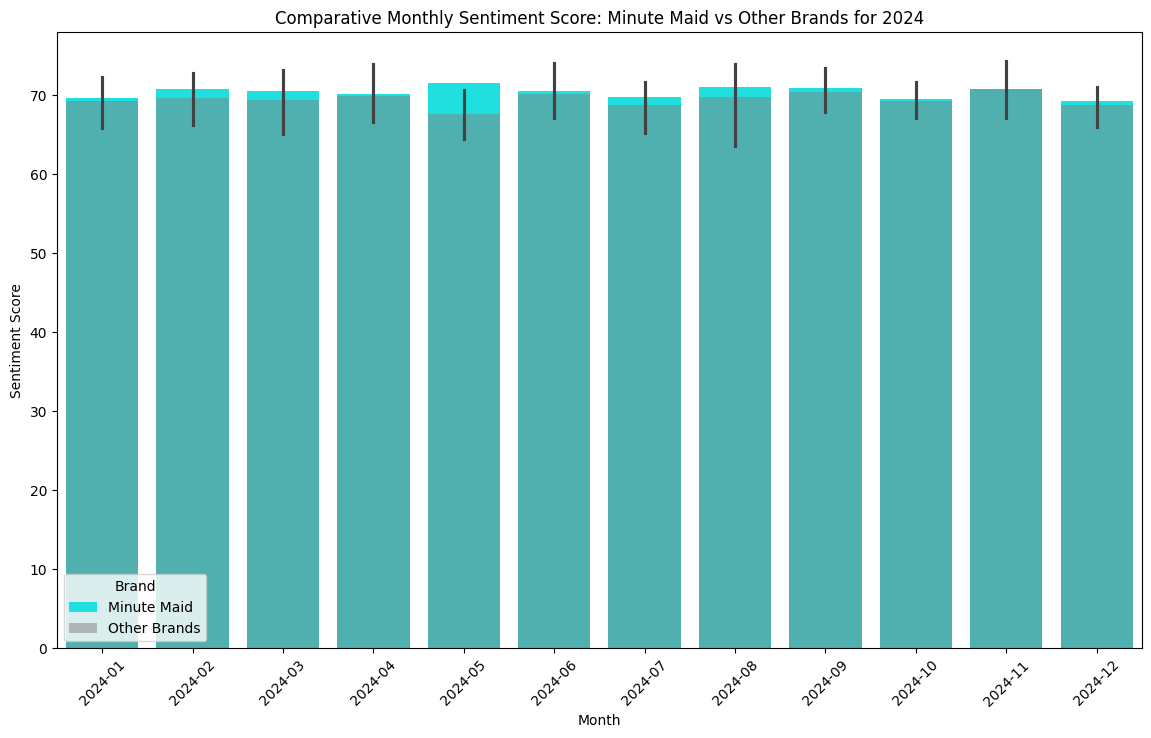

In [14]:
# Filter data for "Minute Maid" and other brands for the year 2023
minute_maid_data = monthly_sentiment_2023[monthly_sentiment_2023['Brand'] == 'Minute Maid']
other_brands_data = monthly_sentiment_2023[monthly_sentiment_2023['Brand'] != 'Minute Maid']

# Plot comparative bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=minute_maid_data, x='Month', y='Sentiment_Score', color='cyan', label='Minute Maid')
sns.barplot(data=other_brands_data, x='Month', y='Sentiment_Score', color='gray', label='Other Brands', alpha=0.5)
plt.title('Comparative Monthly Sentiment Score: Minute Maid vs Other Brands for 2023')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()

# Filter data for "Minute Maid" and other brands for the year 2024
minute_maid_data = monthly_sentiment_2024[monthly_sentiment_2024['Brand'] == 'Minute Maid']
other_brands_data = monthly_sentiment_2024[monthly_sentiment_2024['Brand'] != 'Minute Maid']

# Plot comparative bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=minute_maid_data, x='Month', y='Sentiment_Score', color='cyan', label='Minute Maid')
sns.barplot(data=other_brands_data, x='Month', y='Sentiment_Score', color='gray', label='Other Brands', alpha=0.5)
plt.title('Comparative Monthly Sentiment Score: Minute Maid vs Other Brands for 2024')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()

### Average sentiment score by brand and channel
1. Our brand is present on all the channels, compared to other brands which have presence on utmost 2 channels.
2. The sentiment score is spread across equally on all channels for our brand, which will make it difficult to select the channel for launch of new product.
3. We will face less competition on "General trade", "Modern Trade" and "Q Commerce", as rest of the 2 channels ("HoReCa", "E Commerce") have presence on more than 1 competitor.

In [15]:
avg_sentiment_by_brand_channel = competitor_df.groupby(['Brand', 'Channel'])['Sentiment_Score'].mean().unstack() 
avg_sentiment_by_brand_channel

Channel,E Commerce,General Trade,HoReCa,Modern Trade,Q Commerce
Brand,,,,,
Amazon Solimo,64.658095,NaN,NaN,NaN,NaN
B Natural,NaN,NaN,71.627619,72.359048,NaN
Minute Maid,70.099048,70.750476,70.518095,69.557143,69.728571
Paper Boat,NaN,69.661905,69.449524,NaN,NaN
Real Fruit Juice,67.673333,NaN,NaN,NaN,NaN
Tropicana,NaN,NaN,NaN,NaN,74.680000


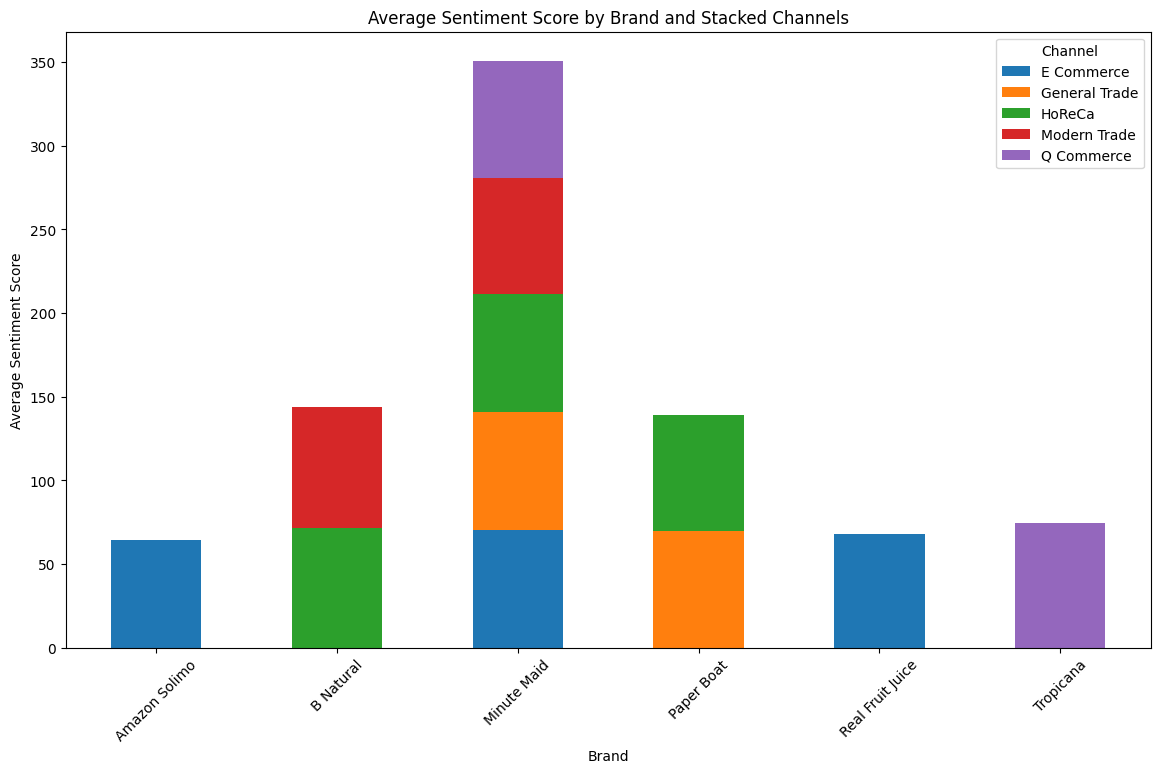

In [ ]:
# Plot the stacked bar chart
avg_sentiment_by_brand_channel.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Average Sentiment Score by Brand and Stacked Channels')
plt.xlabel('Brand')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()